In [65]:
import pandas as pd
import cdsapi
import atlite
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [66]:
df = pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_Central',skiprows=4)
df = df.merge(pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_North',skiprows=4))
print(df.columns)

Index(['REF', 'BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]',
       'NED-N[R1_NED-N(MW)]', 'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]',
       'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')


In [67]:
### Aggreate to hourly data by using mean function ###
df['index_time'] = pd.to_datetime(df["REF"].dt.strftime('%Y-%m-%d-%H'))
df = df.drop(columns=['REF'])
df = df.groupby(by=["index_time"], dropna=False).mean()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2019-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  35065 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    35065 non-null  float64
 2   NED-N[R1_NED-N(MW)]    35065 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    35065 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    35065 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    35065 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


In [68]:
### To cap the generation by installed capacity  ###
print(df.columns)

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')


In [69]:
installed_capacity = [
    34.2,
    126.126,
    73,
    52,
    128.396,
    133.92
]

for i in range(len(df.columns)):
    df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
    df[df.columns[i]] = df[df.columns[i]]/installed_capacity[i]


data_actual = df.copy()
print(data_actual.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2019-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  35065 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    35065 non-null  float64
 2   NED-N[R1_NED-N(MW)]    35065 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    35065 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    35065 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    35065 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_35732\1061966536.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
C:\Users\595078\AppData\Local\Temp\ip

In [70]:
df = pd.DataFrame()
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2019_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
# df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2020_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2021_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2022_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = df.set_index('time_utcadj')

year = 2022
df = df.loc[df.index.year == year]
data_actual = data_actual.loc[data_actual.index.year == year]


In [71]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

In [72]:
for i in name_list:
    print(i)
    print('Acutal PF = ',np.round(data_actual[i].sum() * 100 /len(data_actual),4))
    print('ERA5 PF = ',np.round(df[i].sum() * 100 /len(df),4))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal PF =  9.3195
ERA5 PF =  16.4997

EAN-N[R4_EAN-N(MW)]
Acutal PF =  18.2985
ERA5 PF =  16.6939

NED-N[R1_NED-N(MW)]
Acutal PF =  15.936
ERA5 PF =  16.7998

SSP-N[R1_SSP-N(MW)]
Acutal PF =  17.7362
ERA5 PF =  16.7998

EAL-N[R4_EAL-N(MW)]
Acutal PF =  19.492
ERA5 PF =  16.3847

EAP-N[R4_EAP-N(MW)]
Acutal PF =  19.0299
ERA5 PF =  16.5736



In [73]:
for i in name_list:
    print(i)
    print('Acutal Gen = ',np.round(data_actual[i].sum(),4))
    print('ERA5 Gen = ',np.round(df[i].sum(),4))
    print('Diff from actual percen  = ', np.round((df[i].sum() - data_actual[i].sum())*100/data_actual[i].sum(),1))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal Gen =  816.3845
ERA5 Gen =  1445.3701
Diff from actual percen  =  77.0

EAN-N[R4_EAN-N(MW)]
Acutal Gen =  1602.9526
ERA5 Gen =  1462.3826
Diff from actual percen  =  -8.8

NED-N[R1_NED-N(MW)]
Acutal Gen =  1395.9952
ERA5 Gen =  1471.6584
Diff from actual percen  =  5.4

SSP-N[R1_SSP-N(MW)]
Acutal Gen =  1553.6913
ERA5 Gen =  1471.6584
Diff from actual percen  =  -5.3

EAL-N[R4_EAL-N(MW)]
Acutal Gen =  1707.501
ERA5 Gen =  1435.3024
Diff from actual percen  =  -15.9

EAP-N[R4_EAP-N(MW)]
Acutal Gen =  1667.0221
ERA5 Gen =  1451.8487
Diff from actual percen  =  -12.9



In [74]:
gen_difffromactual = pd.DataFrame()
for i in name_list:
    gen_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()) for j in range(12)]
    gen_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()) for j in range(12)]
    gen_difffromactual_list = [(gen_era5_month_list[j] - gen_actual_month_list[j]) for j in range(12)]
    gen_difffromactual[i] = pd.DataFrame(gen_difffromactual_list)
print(np.round(gen_difffromactual,1))

    BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    18.2                 -1.5                 10.5   
1                    49.9                 -2.9                 13.3   
2                    62.8                -12.8                 12.2   
3                    84.7                 -8.5                 17.2   
4                    43.1                -16.3                 -7.4   
5                    43.7                -19.0                 -0.2   
6                    33.4                -30.5                 -2.8   
7                    77.7                -22.3                 -4.8   
8                    45.7                 -9.6                  7.5   
9                    83.0                 -4.1                  4.3   
10                   39.8                 -2.1                 14.7   
11                   46.9                -10.9                 11.1   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(MW)]  
0       

In [75]:
plantfactor_actual_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_actual_monthly[i] = pd.DataFrame(pf_month_list)

print("pf actual = ",np.round(plantfactor_actual_monthly*100,1))

pf actual =      BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    16.1                 18.9                 17.4   
1                     9.6                 17.5                 15.3   
2                     9.8                 20.4                 17.0   
3                     7.1                 20.3                 16.3   
4                     9.0                 17.6                 16.3   
5                    11.0                 19.7                 17.4   
6                    10.3                 18.7                 15.9   
7                     3.6                 17.3                 14.7   
8                     7.5                 15.1                 12.9   
9                     4.7                 17.0                 15.6   
10                   11.2                 17.3                 15.1   
11                   11.9                 19.8                 17.3   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(MW

In [76]:
plantfactor_era5_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_era5_monthly[i] = pd.DataFrame(pf_month_list)

print("pf era5 = ",np.round(plantfactor_era5_monthly*100,1))

pf era5 =      BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    18.5                 18.7                 18.8   
1                    17.1                 17.0                 17.3   
2                    18.3                 18.7                 18.6   
3                    18.8                 19.1                 18.7   
4                    14.8                 15.4                 15.3   
5                    17.1                 17.0                 17.3   
6                    14.8                 14.6                 15.5   
7                    14.0                 14.3                 14.1   
8                    13.8                 13.8                 13.9   
9                    15.9                 16.4                 16.2   
10                   16.7                 17.0                 17.2   
11                   18.2                 18.3                 18.8   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(MW)]

In [77]:
plantfactor_difffromactual = pd.DataFrame()
for i in name_list:
    pf_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    pf_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    pf_difffromactual_list = [( pf_era5_month_list[j] - pf_actual_month_list[j] ) / pf_actual_month_list[j] for j in range(12)]
    plantfactor_difffromactual[i] = pd.DataFrame(pf_difffromactual_list)
print(np.round(plantfactor_difffromactual*100,1))

    BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    15.2                 -1.1                  8.1   
1                    77.2                 -2.4                 13.0   
2                    85.9                 -8.5                  9.7   
3                   166.3                 -5.8                 14.7   
4                    64.3                -12.4                 -6.1   
5                    55.0                -13.4                 -0.1   
6                    43.4                -21.9                 -2.4   
7                   293.5                -17.3                 -4.3   
8                    84.7                 -8.8                  8.1   
9                   236.7                 -3.3                  3.7   
10                   49.4                 -1.7                 13.5   
11                   53.0                 -7.4                  8.6   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(MW)]  
0       

Measure, time series similarity

In [78]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

EAN-N[R4_EAN-N(MW)]


<Axes: xlabel='time_utcadj'>

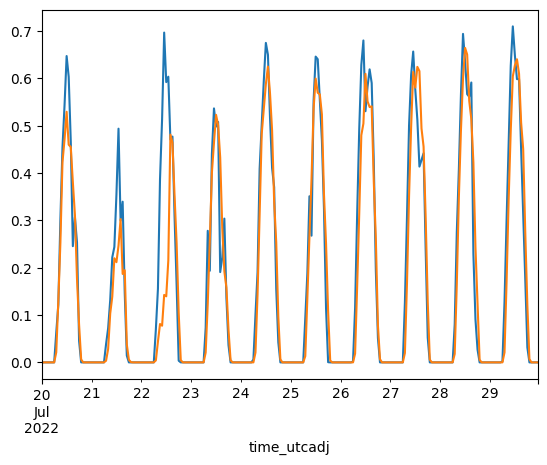

In [79]:
name_index = 1
day = 200
spanday = 10
print(name_list[name_index])
data_actual[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()
df[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()


In [80]:
import numpy as np

def calc_euclidean(actual, predic):
    return np.sqrt(np.sum((actual - predic) ** 2))

def calc_mae(actual, predic):
    return np.mean(np.abs((actual - predic)))


print(" year ======   ",year)
print("                   ")
for name_index in range(len(name_list)):
    ts = pd.DataFrame()
    ts['actual'] = data_actual[name_list[name_index]]
    ts['era5'] = df[name_list[name_index]]
    print(name_list[name_index])
    ## Pearson Correlation ##   
    print('plant = ', name_list[name_index])
    print("          ")
    print("     correalation     ")
    print(ts.loc[ts['actual'] > 0].corr())
    print("          ")
    print('calc_euclidean',calc_euclidean(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print('calc_mape = ',calc_mae(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print("     ")


 year ======    2022
                   
BCPG-N[MCC_BCP-N(MW)]
plant =  BCPG-N[MCC_BCP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.829783
era5    0.829783  1.000000
          
calc_euclidean 6.716779814220589
calc_mape =  0.0934486055913102
     
EAN-N[R4_EAN-N(MW)]
plant =  EAN-N[R4_EAN-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.834117
era5    0.834117  1.000000
          
calc_euclidean 8.792678173644473
calc_mape =  0.10225749850793496
     
NED-N[R1_NED-N(MW)]
plant =  NED-N[R1_NED-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.811932
era5    0.811932  1.000000
          
calc_euclidean 8.605810744180086
calc_mape =  0.1000250631251827
     
SSP-N[R1_SSP-N(MW)]
plant =  SSP-N[R1_SSP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.839148
era5    0.839148  1.000000
          
calc_euclidean 9.14426248519476
calc_mape